# Loan Approval Prediction Model Building (Using Supervised Learning)

The aim of this project is to build a classifier model such that after feeding the features like gender, martial-status, number of dependents, applicant's income, co-applicant's income, Loan Amount, Loan Tenure etc, the model can predict in Yes/No whether the loan shall be approved or not.For this we are training the model with labelled data of Y/N.But before actually building the data i have followed the general convention i.e having a desciptive data exploration. Finding the missing entries, filling them with proper imputations and then finally fitting the training data into the model and  finally, testing the accuracy score


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

df = pd.read_csv("G:/jupyter csvs/training_loan_data.csv") #Reading the dataset in a dataframe using Pandas

# 1. Quick Data Exploration

In [2]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,584900,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,458300,150800.0,12800.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,300000,0.0,6600.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,258300,235800.0,12000.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,600000,0.0,14100.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,6.140000e+02,6.140000e+02,592.000000,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,14641.216216,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8558.732524,65.12041,0.364878
min,1.500000e+04,0.000000e+00,900.000000,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,10000.000000,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,12800.000000,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,16800.000000,360.00000,1.000000
max,8.100000e+06,4.166700e+06,70000.000000,480.00000,1.000000


In [7]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [8]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

## Distribution analysis

In [9]:
df['ApplicantIncome'].head(20)

0      584900
1      458300
2      300000
3      258300
4      600000
5      541700
6      233300
7      303600
8      400600
9     1284100
10     320000
11     250000
12     307300
13     185300
14     129900
15     495000
16     359600
17     351000
18     488700
19     260000
Name: ApplicantIncome, dtype: int64

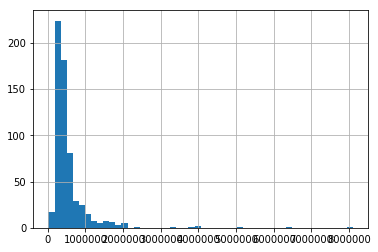

In [10]:
df['ApplicantIncome'].hist(bins=50)

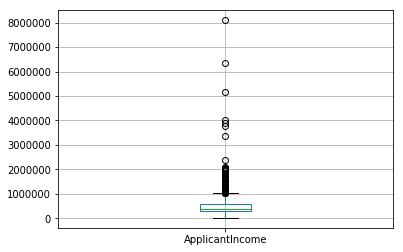

In [11]:
df.boxplot(column='ApplicantIncome')

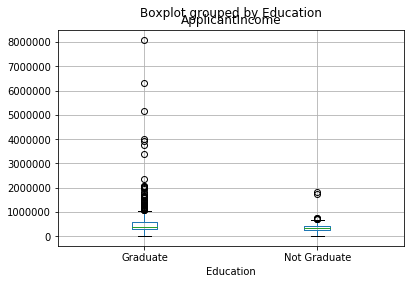

In [12]:
df.boxplot(column='ApplicantIncome', by = 'Education')

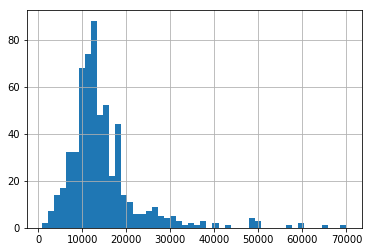

In [13]:
df['LoanAmount'].hist(bins=50)

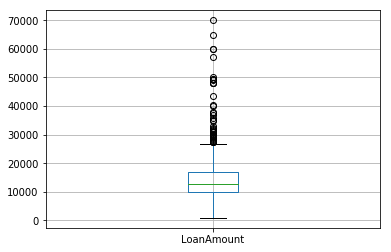

In [14]:
df.boxplot(column='LoanAmount')

# 2. Data Munging in Python : Using Pandas

# Checking missing values in the dataset

In [15]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Fill missing values in LoanAmount

In [16]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [17]:
df['Self_Employed'].fillna('No',inplace=True)

# Treatment for extreme values in distribution of LoanAmount and ApplicantIncome

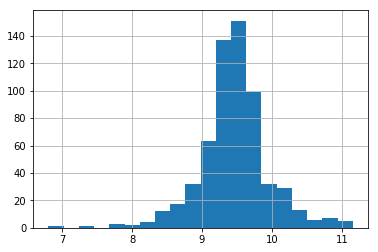

In [18]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

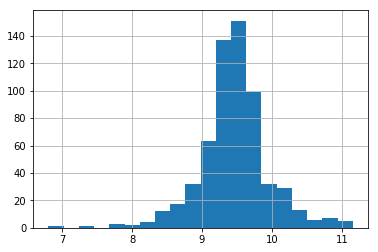

In [19]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 

# 3. Building a Predictive Model in Python

# Before that we will fill all the missing values in the dataset.

In [20]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# ENCODING THE CATEGORICAL VARIABLES INTO NUMERICAL FORM


In [21]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

C:\Users\amank\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [23]:
X = df.drop(['Loan_ID','Loan_Status'],axis='columns')
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 21)

# Logistic Regression

In [24]:
model = LogisticRegression()

model.fit(X_train,y_train)
accuracy_score = model.score(X_test,y_test)

print(accuracy_score)

0.6864864864864865


# Decision Tree

In [25]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
accuracy_score = model.score(X_test,y_test)

print(accuracy_score)


0.7027027027027027


# Random Forest




In [26]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
accuracy_score = model.score(X_test,y_test)

print(accuracy_score)

0.7783783783783784
